In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Prepare Data

In [5]:
import matplotlib.pyplot as plt 
from PIL import Image

In [6]:
dir = '../input/chest-xray-pneumonia/chest_xray'
test_dir = os.path.join(dir,'test') 
train_dir =os.path.join(dir,'train') 
val_dir =os.path.join(dir,'val') 

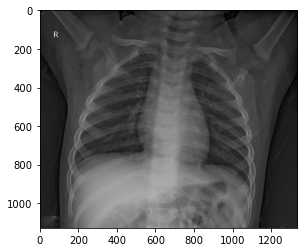

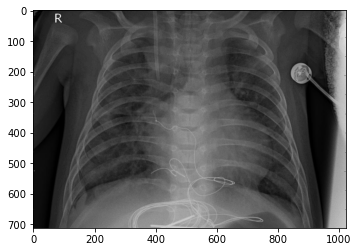

In [7]:
categ = ['NORMAL', 'PNEUMONIA']
for ca in categ:
    path = os.path.join(train_dir,ca)
    for img in os.listdir(path):
        img_arr =Image.open(os.path.join(path,img)) 
        arr = np.array(img_arr)
        plt.imshow(np.array(img_arr),cmap='gray')
        plt.show()
        break
    

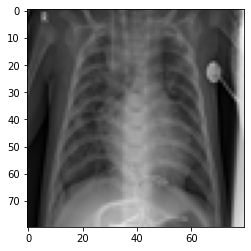

In [8]:
img_size = 80
new_img = img_arr.resize((img_size,img_size))
plt.imshow(new_img,cmap='gray')
plt.show()

(941, 1612)


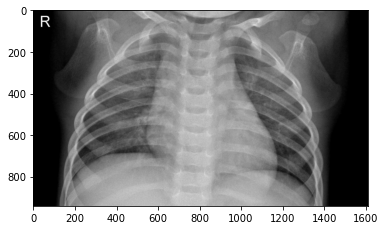

In [9]:
for ca in categ:
    path = os.path.join(test_dir,ca)
    for img in os.listdir(path):
        img_arr =Image.open(os.path.join(path,img)) 
        print(np.array(img_arr).shape)
        plt.imshow(img_arr,cmap='gray')
        plt.show()
        break
    break

###  Load Data To List

In [10]:
def creat_data(my_list,categ,my_dir):
    img_size = 150
    for ca in categ:
        path = os.path.join(my_dir,ca)
        class_num = categ.index(ca)
        for img in os.listdir(path):
            try:
                img_arr =Image.open(os.path.join(path,img)) 
                new_img = img_arr.resize((img_size,img_size))
                new_img = np.asarray(new_img)
                arr = new_img.reshape((img_size, img_size, 1))
                my_list.append([arr,class_num])
            except Exception as e:
                e = e

In [11]:
train_list = []
test_list = []
val_list = []
creat_data(train_list,categ,train_dir)
print(len(train_list))

4933


In [12]:
creat_data(test_list,categ,test_dir)
print(len(test_list))

624


In [13]:
creat_data(val_list,categ,val_dir)
print(len(val_list))

16


### Increase amount of val. data

In [14]:
for i in range(608):
    ele = train_list.pop(0)
    val_list.append(ele)

In [15]:
print(len(train_list))
print(len(val_list))

4325
624


### Split Data  

In [16]:
def split_data(X,y,my_list):
    img_size = 150
    for fe,la in my_list:
        X.append(fe)
        y.append(la)
    X = np.array(X).reshape(-1, img_size, img_size, 1)

In [17]:
X_train = []
y_train = []
X_test = []
y_test = []
X_val = []
y_val = []
split_data(X_train, y_train, train_list)

In [18]:
split_data(X_test, y_test, test_list)

In [19]:
split_data(X_val, y_val, val_list)

In [20]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
X_val = np.asarray(X_val)
y_val = np.asarray(y_val)

In [21]:
X_train = X_train/255.0
X_test = X_test/255.0
X_val = X_val/255.0

# Building The Model

In [22]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [23]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights=True)

In [24]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.5))



model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [25]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [26]:
model.fit(X_train, y_train,epochs = 150, batch_size = 32, validation_data = (X_test,y_test),callbacks = [early_stop])

Epoch 1/150
136/136 [==============================] - 3s 21ms/step - loss: 0.5727 - accuracy: 0.8386 - val_loss: 0.4605 - val_accuracy: 0.7532
Epoch 2/150
136/136 [==============================] - 2s 18ms/step - loss: 0.1569 - accuracy: 0.9376 - val_loss: 0.5555 - val_accuracy: 0.7404
Epoch 3/150
136/136 [==============================] - 2s 18ms/step - loss: 0.1230 - accuracy: 0.9565 - val_loss: 0.8266 - val_accuracy: 0.6971
Epoch 4/150
136/136 [==============================] - 2s 18ms/step - loss: 0.0926 - accuracy: 0.9628 - val_loss: 0.7709 - val_accuracy: 0.7147
Epoch 5/150
136/136 [==============================] - 2s 18ms/step - loss: 0.0870 - accuracy: 0.9688 - val_loss: 1.0425 - val_accuracy: 0.7292
Epoch 6/150
136/136 [==============================] - 2s 18ms/step - loss: 0.0755 - accuracy: 0.9711 - val_loss: 0.8737 - val_accuracy: 0.7484
Epoch 7/150
136/136 [==============================] - 2s 18ms/step - loss: 0.0738 - accuracy: 0.9716 - val_loss: 0.9129 - val_accuracy:

In [32]:
# Save the entire model in HDF5 format
model.save("chest_xray_model.h5")

print("Model saved successfully as chest_xray_model.h5")


Model saved successfully as chest_xray_model.h5


In [44]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

Confusion Matrix:
[[369 247]
 [  0   8]]


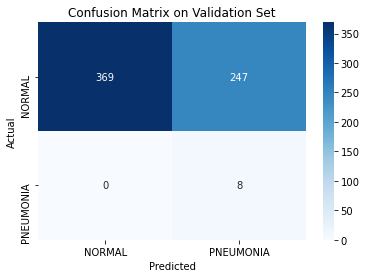


Classification Report:
              precision    recall  f1-score   support

      NORMAL       1.00      0.60      0.75       616
   PNEUMONIA       0.03      1.00      0.06         8

    accuracy                           0.60       624
   macro avg       0.52      0.80      0.41       624
weighted avg       0.99      0.60      0.74       624



In [45]:
# Get predictions on validation set
val_predictions = model.predict(X_val)
val_preds = (val_predictions > 0.5).astype(int).flatten()  # Binary threshold for sigmoid output

# Confusion Matrix
cm = confusion_matrix(y_val, val_preds)
print("Confusion Matrix:")
print(cm)

# Visualize Confusion Matrix (optional, for better readability)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NORMAL', 'PNEUMONIA'], yticklabels=['NORMAL', 'PNEUMONIA'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Validation Set')
plt.show()

# Other Metrics (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_val, val_preds, target_names=['NORMAL', 'PNEUMONIA']))